In [27]:
import numpy
from matplotlib import pyplot
%matplotlib inline

def F(ro, romax, vmax):
    
    return vmax*ro*(1-ro/romax)

def vel(ro, romax, vmax):
    
    return vmax*(1-ro/romax)
    
def solver(dt, nt, L, nx, x01, x02, r01, r02, romax, vmax):

    x = numpy.linspace(0.0, L, nx)
    ro0 = numpy.zeros(nx)+r01
    rho_hist  = numpy.zeros((nt,nx))

    mask = numpy.where(numpy.logical_and(x >= x01, x < x02))
    ro0[mask] = r02 * x[mask]/x02
       
    ro = ro0.copy()
    rho_hist[0,:] = ro0.copy()

    for n in range(1, nt):

        ro[1:]  = ro[1:] - dt*(F(ro[1:], romax, vmax)-F(ro[:-1], romax, vmax))/dx
        rho_hist[n, 1:] = ro[1:]
    
    return x, ro0, ro, rho_hist


def plot(nt, x, ro0, ro, rho_hist):
    pyplot.figure(figsize=(8.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('$\u03C1$')
    pyplot.grid()
    pyplot.plot(x, ro0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
#    pyplot.plot(x, ro, label='nt = {}'.format(nt),
#            color='C1', linestyle='-', linewidth=2)
    pyplot.plot(x, rho_hist[nt,:], label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
#    pyplot.ylim(0.0, 60);
    ro0

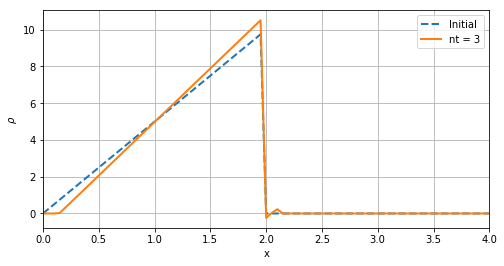

In [60]:
nx = 81 
L  = 4 
dx = L / (nx - 1) 
nt = 30
sigma = 1.0
vmax = 1.0
romax = 10.0
dt = sigma * dx / vmax
r01   = 0.0
r02   = 10.0
x01   = 0
x02   = 2
        
x, ro0, ro, rho_hist = solver(dt, nt, L, nx, x01, x02, r01, r02, romax, vmax)
plot (3, x, ro0, ro, rho_hist)

In [57]:
import ipywidgets

In [58]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description ='Time step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), rho_hist=ipywidgets.fixed(rho_hist))
    
    
    return w

In [59]:
interactive_plot(x, rho_hist)
#display(w)


ValueError: cannot find widget or abbreviation for argument: 'nt'

In [61]:
len(rho_hist)

30